# AGGREGATION & COMBINATION

In [4]:
"""
RECAP
- numpy
    - arrays
    - dimensiones
        - un valor: scalar
        - 1d: vector -> serie
        - 2d: matriz -> df
        - 2+: tensor
    - pandas construido sonbre numpy 
    - eficiente: rápido cálculos
- pandas
    - librería: tablas, ágil
        - no se cuelga con un millón de filas como excel
    - exploración
        - df.describe(), df.info() , df.head(), df.tail(), df.dtypes
        - dtypes -> object -> strings
        - np.NaN -> float
            - None, np.Nan, np.NaN, np.nan ...
            - fillna(), 
    - transformación
        - valores duplicados
        - valores nulos
        - cambio de tipos (astype)

        - strings: rename (col), limpiar los datos de las columnas ("Siempre"...)
        - Transpose
    - combinación
        - hacer resúmenes: agregar datos -> pivot_table
        - concatenaciones y joins de tablas
            - SQL (join) -> pandas (merge) | sobre columnas
            -             -> pandas (join) | sobre el índice
    - regex: regular expressions
        - encontrar patrones de texto
"""

'\nRECAP\n- numpy\n    - arrays\n    - dimensiones\n        - un valor: scalar\n        - 1d: vector -> serie\n        - 2d: matriz -> df\n        - 2+: tensor\n    - pandas construido sonbre numpy \n    - eficiente: rápido cálculos\n- pandas\n    - librería: tablas, ágil\n        - no se cuelga con un millón de filas como excel\n    - exploración\n        - df.describe(), df.info() , df.head(), df.tail(), df.dtypes\n        - dtypes -> object -> strings\n        - np.NaN -> float\n            - None, np.Nan, np.NaN, np.nan ...\n            - fillna(), \n    - transformación\n        - valores duplicados\n        - valores nulos\n        - cambio de tipos (astype)\n\n        - strings: rename (col), limpiar los datos de las columnas ("Siempre"...)\n        - Transpose\n    - combinación\n        - hacer resúmenes: agregar datos -> pivot_table\n        - concatenaciones y joins de tablas\n            - SQL (join) -> pandas (merge) | sobre columnas\n            -             -> pandas (j

In [1]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv("avocado_kaggle.csv")
df.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
12127,38,2016-04-03,1.08,2909.88,15.51,772.7,0.0,2121.67,225.84,1895.83,0.0,organic,2016,Boise


In [ ]:
df_region = df.groupby("region").agg({"TotalVolume": "sum"})
df_region

KeyError: "Column(s) ['TotalVolume'] do not exist"

## Agregación de datos

`groupby, tabla dinámica y tabla cruzada`

### groupby
La función GroupBy de Pandas es una función potente y versátil en Python. Nos permite dividir los datos en grupos separados para realizar cálculos que permitan un mejor análisis.
Un DataFrame se puede agrupar en sus filas (eje=0) o en sus columnas (eje=1). Una vez hecho esto, se aplica una función a cada grupo, lo que produce un nuevo valor. Finalmente, los resultados de todas esas aplicaciones de funciones se combinan en un objeto de resultado. La forma del objeto resultante generalmente dependerá de lo que se haga con los datos.

`df[subset].groupby(category).aggregation()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [8]:
df[["AveragePrice", "region"]].groupby("region").agg({"AveragePrice": "mean"})

,AveragePrice
region,
Albany,1.561036
Atlanta,1.337959
BaltimoreWashington,1.534231
Boise,1.348136
Boston,1.530888
BuffaloRochester,1.516834
California,1.395325
Charlotte,1.606036
Chicago,1.556775


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [84]:
df_region = df[["AveragePrice", "region", 'Total Volume']].groupby("region").agg({"Total Volume": "sum"})

# SQL: cannot ungrouped column in clause: si seleccionáis algo que no se agrega en una agregación (GROUP BY), pandas no dice nada
# pero SQL os dará error
df_region

KeyError: "None of [Index(['AveragePrice', 'region', 'Total Volume'], dtype='object')] are in the [columns]"

In [ ]:
"""
SELECT  estas_columnas
FROM
    esta_tabla  
WHERE col_1 = valor
LIMIT 10;

-- query / SQL statement

"""

In [13]:
df[["AveragePrice", "region", 'Total Volume']].groupby("region").agg({"Total Volume": "sum", "AveragePrice":"mean"})

,Total Volume,AveragePrice
region,,
Albany,1.606780e+07,1.561036
Atlanta,8.860512e+07,1.337959
BaltimoreWashington,1.347139e+08,1.534231
Boise,1.441319e+07,1.348136
Boston,9.727398e+07,1.530888
BuffaloRochester,2.296247e+07,1.516834
California,1.028982e+09,1.395325
Charlotte,3.555554e+07,1.606036
Chicago,1.337023e+08,1.556775


In [52]:
pd.set_option("display.max_columns", None)

df = pd.read_csv("employees.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


`agrupar por departamentos y su edad media`

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
df.groupby("Department").agg({"Age": "mean"})

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


`agrupar por departamentos y su edad máxima`

In [18]:
df.groupby("Department").agg({"Age": "max"})

,Age
Department,
Human Resources,59
Research & Development,60
Sales,60


`agrupar por departamentos y su edad mínima`

In [22]:
df.groupby("Department").agg({"Age": "mean"})

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


In [50]:
df.groupby("Department").agg({"Department": "count"}) # value_counts

,Department
Department,
Human Resources,63
Research & Development,961
Sales,446


In [20]:
df.groupby("Department").agg({"Age": "std"})
"""
¿Cómo se interpreta la std en esta tabla?: dispersión de edad
- Hay más dispersión en RRHH que en ventas
- La diferencia general respecto a la media
- Menor dispersión, las edades de los empleados son más similares entre sí.
"""

,Age
Department,
Human Resources,9.226290
Research & Development,9.178964
Sales,9.032611


`groupby: 2+`: Diferentes campos educativos y sus salarios medios en cada uno de los departamentos

In [23]:
df[["EducationField", "Department", "MonthlyIncome"]].groupby(["Department", "EducationField"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources     7241.148148
                       Life Sciences       6914.062500
                       Medical             6594.076923
                       Other               5016.666667
                       Technical Degree    3081.250000
Research & Development Life Sciences       6179.984091
                       Medical             6539.223140
                       Other               6278.687500
                       Technical Degree    5760.819149
Sales                  Life Sciences       7246.233333
                       Marketing           7348.584906
                       Medical             6377.227273
                       Other               5398.733333
                       Technical Degree    6066.294118

In [25]:
df[["EducationField", "Department", "MonthlyIncome"]].groupby(["Department", "EducationField"]).agg({"MonthlyIncome":"mean"}).sort_values(by="MonthlyIncome", ascending=False)

MonthlyIncome
Department             EducationField                 
Sales                  Marketing           7348.584906
                       Life Sciences       7246.233333
Human Resources        Human Resources     7241.148148
                       Life Sciences       6914.062500
                       Medical             6594.076923
Research & Development Medical             6539.223140
Sales                  Medical             6377.227273
Research & Development Other               6278.687500
                       Life Sciences       6179.984091
Sales                  Technical Degree    6066.294118
Research & Development Technical Degree    5760.819149
Sales                  Other               5398.733333
Human Resources        Other               5016.666667
                       Technical Degree    3081.250000

In [26]:
df[["EducationField", "Department", "MonthlyIncome"]].sort_values(by="MonthlyIncome", ascending=False).groupby(["Department", "EducationField"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources     7241.148148
                       Life Sciences       6914.062500
                       Medical             6594.076923
                       Other               5016.666667
                       Technical Degree    3081.250000
Research & Development Life Sciences       6179.984091
                       Medical             6539.223140
                       Other               6278.687500
                       Technical Degree    5760.819149
Sales                  Life Sciences       7246.233333
                       Marketing           7348.584906
                       Medical             6377.227273
                       Other               5398.733333
                       Technical Degree    6066.294118

In [24]:
df[["EducationField", "Department", "MonthlyIncome"]].groupby(["Department", "EducationField"]).agg({"MonthlyIncome":"max"})

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources           19636
                       Life Sciences             19717
                       Medical                   18200
                       Other                      7988
                       Technical Degree           4323
Research & Development Life Sciences             19999
                       Medical                   19859
                       Other                     19613
                       Technical Degree          19943
Sales                  Life Sciences             19847
                       Marketing                 19845
                       Medical                   19833
                       Other                     10932
                       Technical Degree          16872

In [29]:
df[["EducationField", "Department", "MonthlyIncome", "BusinessTravel"]].groupby(["Department", "EducationField", "BusinessTravel"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
Department             EducationField   BusinessTravel                  
Human Resources        Human Resources  Non-Travel          11298.500000
                                        Travel_Frequently    5116.500000
                                        Travel_Rarely        7036.352941
                       Life Sciences    Non-Travel           2706.000000
                                        Travel_Frequently    3615.500000
                                        Travel_Rarely        7745.230769
                       Medical          Non-Travel           6272.000000
                                        Travel_Frequently   10172.500000
                                        Travel_Rarely        5910.600000
                       Other            Travel_Frequently    2991.000000
                                        Travel_Rarely        6029.500000
                       Technical Degree Travel_Rarely        3081.250000
Research & Development Life Sciences    Non-Travel           6161.488372
                                        Travel_Frequently    6417.967033
                                        Travel_Rarely        6111.810458
                       Medical          Non-Travel           6196.435897
                                        Travel_Frequently    6715.794118
                                        Travel_Rarely        6544.542969
                       Other            Non-Travel           4402.750000
                                        Travel_Frequently    4654.600000
                                        Travel_Rarely        6753.580000
                       Technical Degree Non-Travel           3674.000000
                                        Travel_Frequently    4655.461538
                                        Travel_Rarely        6294.028571
Sales                  Life Sciences    Non-Travel           7060.368421
                                        Travel_Frequently    7146.600000
                                        Travel_Rarely        7310.792079
                       Marketing        Non-Travel           5882.916667
                                        Travel_Frequently    5885.296296
                                        Travel_Rarely        7824.391667
                       Medical          Non-Travel           7621.600000
                                        Travel_Frequently    5357.687500
                                        Travel_Rarely        6439.629032
                       Other            Non-Travel           8017.000000
                                        Travel_Frequently    4880.333333
                                        Travel_Rarely        4698.777778
                       Technical Degree Non-Travel           5160.333333
                                        Travel_Frequently    4119.375000
                                        Travel_Rarely        6861.652174

In [30]:
df[["EducationField", "Department", "MonthlyIncome", "BusinessTravel"]].groupby(["EducationField", "BusinessTravel", "Department"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
EducationField   BusinessTravel    Department                           
Human Resources  Non-Travel        Human Resources          11298.500000
                 Travel_Frequently Human Resources           5116.500000
                 Travel_Rarely     Human Resources           7036.352941
Life Sciences    Non-Travel        Human Resources           2706.000000
                                   Research & Development    6161.488372
                                   Sales                     7060.368421
                 Travel_Frequently Human Resources           3615.500000
                                   Research & Development    6417.967033
                                   Sales                     7146.600000
                 Travel_Rarely     Human Resources           7745.230769
                                   Research & Development    6111.810458
                                   Sales                     7310.792079
Marketing        Non-Travel        Sales                     5882.916667
                 Travel_Frequently Sales                     5885.296296
                 Travel_Rarely     Sales                     7824.391667
Medical          Non-Travel        Human Resources           6272.000000
                                   Research & Development    6196.435897
                                   Sales                     7621.600000
                 Travel_Frequently Human Resources          10172.500000
                                   Research & Development    6715.794118
                                   Sales                     5357.687500
                 Travel_Rarely     Human Resources           5910.600000
                                   Research & Development    6544.542969
                                   Sales                     6439.629032
Other            Non-Travel        Research & Development    4402.750000
                                   Sales                     8017.000000
                 Travel_Frequently Human Resources           2991.000000
                                   Research & Development    4654.600000
                                   Sales                     4880.333333
                 Travel_Rarely     Human Resources           6029.500000
                                   Research & Development    6753.580000
                                   Sales                     4698.777778
Technical Degree Non-Travel        Research & Development    3674.000000
                                   Sales                     5160.333333
                 Travel_Frequently Research & Development    4655.461538
                                   Sales                     4119.375000
                 Travel_Rarely     Human Resources           3081.250000
                                   Research & Development    6294.028571
                                   Sales                     6861.652174

In [ ]:
# multiindex: https://pandas.pydata.org/docs/user_guide/advanced.html

`más campos`

In [ ]:
# cuidado con el orden al hacer el grouipby

In [ ]:
# PREGUNTA: sort_values (ascending=True/False) no ordena como debería

In [49]:
df[["MonthlyIncome", "Department", "EducationField", "BusinessTravel"]].groupby(["Department", "EducationField", "BusinessTravel"]).agg({"MonthlyIncome": "mean"}) # ?

MonthlyIncome
Department             EducationField   BusinessTravel                  
Human Resources        Human Resources  Non-Travel          11298.500000
                                        Travel_Frequently    5116.500000
                                        Travel_Rarely        7036.352941
                       Life Sciences    Non-Travel           2706.000000
                                        Travel_Frequently    3615.500000
                                        Travel_Rarely        7745.230769
                       Medical          Non-Travel           6272.000000
                                        Travel_Frequently   10172.500000
                                        Travel_Rarely        5910.600000
                       Other            Travel_Frequently    2991.000000
                                        Travel_Rarely        6029.500000
                       Technical Degree Travel_Rarely        3081.250000
Research & Development Life Sciences    Non-Travel           6161.488372
                                        Travel_Frequently    6417.967033
                                        Travel_Rarely        6111.810458
                       Medical          Non-Travel           6196.435897
                                        Travel_Frequently    6715.794118
                                        Travel_Rarely        6544.542969
                       Other            Non-Travel           4402.750000
                                        Travel_Frequently    4654.600000
                                        Travel_Rarely        6753.580000
                       Technical Degree Non-Travel           3674.000000
                                        Travel_Frequently    4655.461538
                                        Travel_Rarely        6294.028571
Sales                  Life Sciences    Non-Travel           7060.368421
                                        Travel_Frequently    7146.600000
                                        Travel_Rarely        7310.792079
                       Marketing        Non-Travel           5882.916667
                                        Travel_Frequently    5885.296296
                                        Travel_Rarely        7824.391667
                       Medical          Non-Travel           7621.600000
                                        Travel_Frequently    5357.687500
                                        Travel_Rarely        6439.629032
                       Other            Non-Travel           8017.000000
                                        Travel_Frequently    4880.333333
                                        Travel_Rarely        4698.777778
                       Technical Degree Non-Travel           5160.333333
                                        Travel_Frequently    4119.375000
                                        Travel_Rarely        6861.652174

#### agrupar y agregar

Otra forma de agrupar con sintaxis agg
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

- media
- suma
- recuento

Supongamos que queremos calcular la media de la columna data1 utilizando las etiquetas de key1. Hay varias formas de hacerlo. Una es acceder a data1 y llamar a groupby con la columna (una String) en key1.
Los datos (una Serie) se han agregado en función de la clave de grupo, lo que produce una nueva String que ahora está indexada por los valores únicos de la columna key1. El índice resultante tiene el nombre 'key1' porque la columna DataFrame `df['key1']` lo tenía.

### Tablas dinámicas

[Comparación entre tabla dinámica y tabla agrupada](https://towardsdatascience.com/una-comparacion-entre-tabla-agrupada-y-tabla-dinámica-en-pythons-pandas-module-527909e78d6b?source=userActivityShare-4c6d9a33c6-1674605913&_branch_match_id=1146490620103499300&_branch_referrer=H4sIAAAAAAAAA8soKSkottLXz8nMy9bLTU3JLM3VS87P1TfKCvCtKvOvCCpPAgAN4ht%2FIwAAAA%3D%3D)

```pivot_table(df, valores=Ninguno, índice=Ninguno, columnas=Ninguno, aggfunc='media', ...)```

* Podemos crear una tabla dinámica de estilo hoja de cálculo como un DataFrame. Los niveles de la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame resultante.

In [54]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
496,21,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,Male,49,3,1,Sales Representative,3,Single,3447,24444,1,Y,No,11,3,3,80,0,3,2,3,3,2,1,2
1136,28,Yes,Travel_Rarely,329,Research & Development,24,3,Medical,1,1604,3,Male,51,3,1,Laboratory Technician,2,Married,2408,7324,1,Y,Yes,17,3,3,80,3,1,3,3,1,1,0,0
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10


In [55]:
pd.pivot_table(df, columns="Department", aggfunc={"Age":"mean"})

Department,Human Resources,Research & Development,Sales
Age,37.809524,37.042664,36.542601


<Axes: >

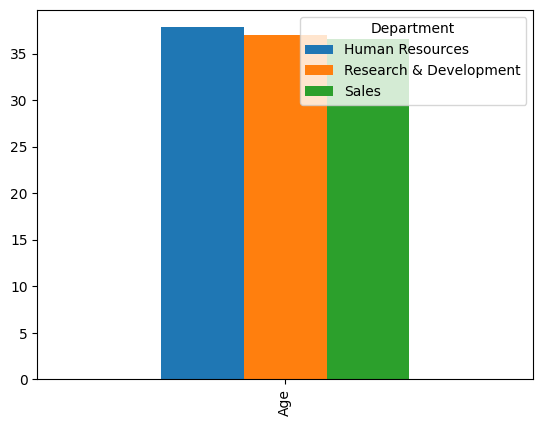

In [73]:
df.pivot_table(columns="Department", values="Age", aggfunc={"Age":"mean"}).plot(kind="bar")

<Axes: xlabel='Department'>

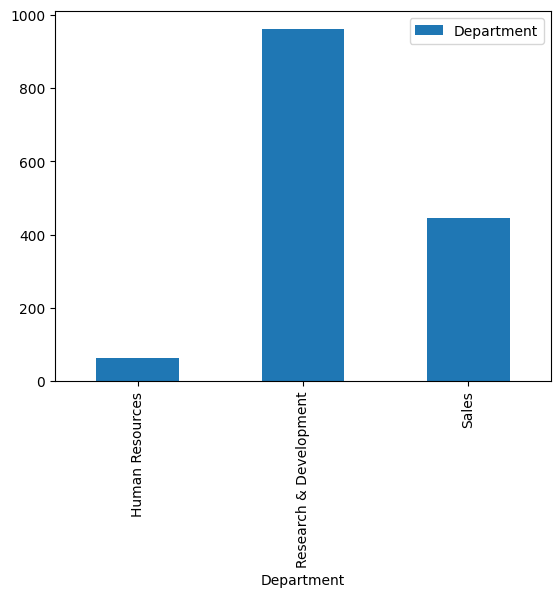

In [76]:
df.groupby("Department").agg({"Department": "count"}).plot(kind="bar") # value_counts

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

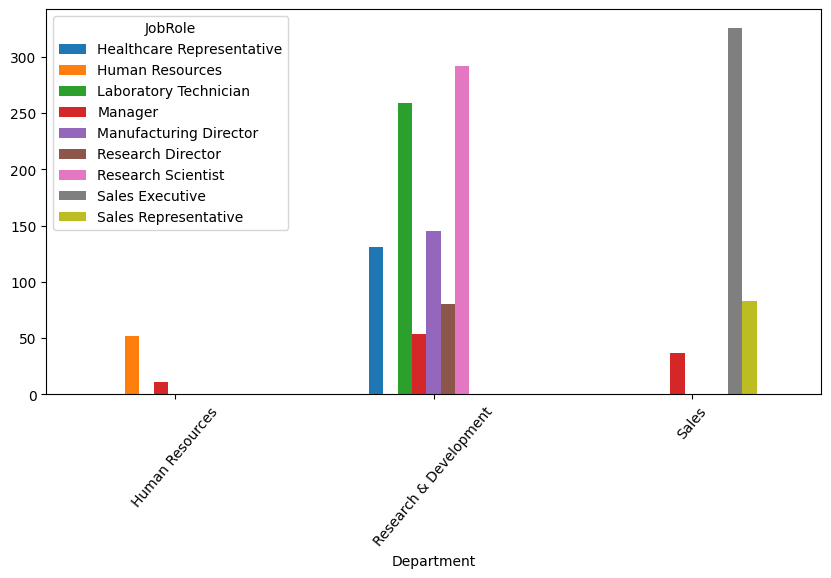

In [80]:
job_role_counts = df.groupby(["Department", "JobRole"]).size().unstack()
job_role_counts.plot(kind="bar", figsize=(10, 5))
plt.xticks(rotation=50)

In [74]:
import matplotlib.pyplot as plt

df.pivot(columns="Department", values="JobRole")

Department,Human Resources,Research & Development,Sales
0,NaN,NaN,Sales Executive
1,NaN,Research Scientist,NaN
2,NaN,Laboratory Technician,NaN
3,NaN,Research Scientist,NaN
4,NaN,Laboratory Technician,NaN
...,...,...,...
1465,NaN,Laboratory Technician,NaN
1466,NaN,Healthcare Representative,NaN
1467,NaN,Manufacturing Director,NaN
1468,NaN,NaN,Sales Executive


In [61]:
df.pivot(columns="Department", values="EducationField")

Department,Human Resources,Research & Development,Sales
0,NaN,NaN,Life Sciences
1,NaN,Life Sciences,NaN
2,NaN,Other,NaN
3,NaN,Life Sciences,NaN
4,NaN,Medical,NaN
...,...,...,...
1465,NaN,Medical,NaN
1466,NaN,Medical,NaN
1467,NaN,Life Sciences,NaN
1468,NaN,NaN,Medical


Tabla dinámica: el departamento y sus edades medias

Tabla dinámica: el departamento y sus edades máximas

`tabla dinámica`: el departamento y sus edades mínimas

Tabla dinámica: el departamento y su edad media

Tabla dinámica de múltiples índices: Departamento y campo de educación y verificación de los valores salariales máximos de los empleados

### Diferencias entre la tabla dinámica y la función groupby

`groupby`: edad media del equipo por abreviatura del equipo y temporada.

`pivot_table`: edad media del equipo por abreviatura del equipo y temporada.

### Crosstab

* Calcular una tabulación cruzada simple de dos (o más) factores. De manera predeterminada, calcula una tabla de frecuencias de los factores a menos que se pase una matriz de valores y una función de agregación. Generalmente se utiliza para ver la frecuencia de dos variables cualitativas: cuántas veces el valor de una columna aparece en la otra.

```pd.crosstab(df[columna1], df[columna2])```

In [81]:
pd.crosstab(df["Department"], df["EducationField"])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


In [83]:
pd.crosstab(df["Department"], df["EducationField"], df["MonthlyIncome"], aggfunc="mean")

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,7241.148148,6914.062500,NaN,6594.076923,5016.666667,3081.250000
Research & Development,NaN,6179.984091,NaN,6539.223140,6278.687500,5760.819149
Sales,NaN,7246.233333,7348.584906,6377.227273,5398.733333,6066.294118


In [ ]:
# gropuby, pivot, crosstab

-------------------------------------------------- -------------------------------------------------- -------------------------------------------------- -------------------------------------------------- ----

## Hands-on

#### Import `business.csv` and respond to to following questions:
##### Revenue & Sales Analysis
	1.	Which country has generated the highest total sales?
	2.	Which city has the highest average purchase amount?
	3.	What is the total revenue for each product category?
	4.	Which country has the most transactions with negative amounts?
	5.	How many purchases were made without a discount, and how much revenue did they generate?
##### Customer Insights
	6.	Who is the top-spending customer overall?
	7.	Which customer has spent the most in the “Electronics” category?
	8.	How many customers have made repeat purchases?
	9.	Which customer has received the most discounts?
##### Review Sentiment & Correlations
	10.	Are negative reviews correlated with low purchase amounts?
	11.	Which country has the most positive vs. negative reviews?
	12.	Do customers who received discounts leave better reviews?
	13.	Are refunds (negative amounts) more common among customers who left bad reviews?

## Combinación de datos: mezcla de Dataframes

- https://realpython.com/pandas-merge-join-and-concat/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Concatenación: dos cosas juntas
Unimos los dataframes a lo largo del eje 0, uno debajo del otro. Alineamos las columnas por etiqueta.

#### Concatenación en el eje 0 (filas)

#### Concatenación en el eje 1 (columnas)

![Uniones SQL](https://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg)

### MERGE: columnas relacionadas

[Merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) es más útil cuando desea fusionar filas que comparten datos.

In [73]:
from IPython.display import display_html 

In [74]:
df1 = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


df2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

df3 = pd.DataFrame(
    {
        "key1": ["K90", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K5", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "Y": ["D0", "D70", "D2", "D5"],
    }
)

In [75]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [76]:
# merge, default is inner

result = pd.merge(df1, df2)
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### LEFT MERGE

In [77]:
left_merge = pd.merge(df1, df2, how="left")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
left_merge = left_merge.style.set_table_attributes("style='display:inline'").set_caption("left_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [78]:
display_html(left_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,nan,nan
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,nan,nan


#### RIGHT MERGE

In [79]:
right_merge = pd.merge(df1, df2, how="right")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
right_merge = right_merge.style.set_table_attributes("style='display:inline'").set_caption("right_merge")

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(),raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [80]:
display_html(right_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,nan,nan,C3,D3


#### Fusión INTERNA

In [81]:
inner_merge = pd.merge(df1, df2, how="inner")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
inner_merge = inner_merge.style.set_table_attributes("style='display:inline'").set_caption("inner_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [82]:
display_html(inner_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### OUTER MERGE

In [83]:
outer_merge = pd.merge(df1, df2, how="outer")

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
outer_merge = outer_merge.style.set_table_attributes("style='display:inline'").set_caption("outer_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [84]:
display_html(outer_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,nan,nan
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,nan,nan
5,K2,K0,nan,nan,C3,D3


### JOIN & CONCAT on different columns

In [85]:
df1_docs = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2_docs = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [86]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


#### Concatenación en dos columnas diferentes

In [87]:
concat_docs = pd.concat([df1_docs, df2_docs], axis=1, keys=["1st table", "2nd table"])

df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = concat_docs.style.set_table_attributes("style='display:inline'").set_caption('concat_docs')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [88]:
display_html(merge_styler._repr_html_(), raw=True)

concat_docs 
 
 
   
 1st table 
 2nd table 
 
 
   
 lkey 
 value 
 rkey 
 value 
 
 
 
 
 0 
 foo 
 1 
 foo 
 5 
 
 
 1 
 bar 
 2 
 bar 
 6 
 
 
 2 
 baz 
 3 
 baz 
 7 
 
 
 3 
 foo 
 5 
 foo 
 8

#### Merge en dos columnas diferentes

In [89]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [90]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_fromleft", "_fromright"])

In [91]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_from_left", "_from_right"])


df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = merge_docs.style.set_table_attributes("style='display:inline'").set_caption('merge_docs')

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [92]:
display_html(merge_styler._repr_html_(), raw=True)

,lkey,value_from_left,rkey,value_from_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [93]:
# suffixes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [94]:
# concat: putting things together
# join/merge: putting things together THAT ARE RELATED
    # related info in the same place -> reduces redundancy

### Join: índice relacionado
El join, a diferencia del merge, unirá los dataframes y donde no haya registros en el "índice" pondrá NaN

In [95]:
import numpy as np
import pandas as pd   
from IPython.display import display_html 

In [96]:
left_df = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right_df = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

In [97]:
df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2
,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [98]:
result = left_df.join(right_df, how="inner")

#Rendering the df's in the same line. No need to learn this code

df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')
df1_df2_merged = result.style.set_table_attributes("style='display:inline'").set_caption('JOIN')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_() + df1_df2_merged._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

Left table 
 
 
   
 A 
 B 
 
 
 
 
 K0 
 A0 
 B0 
 
 
 K1 
 A1 
 B1 
 
 
 K2 
 A2 
 B2 
 
 
 

 
 Right table 
 
 
   
 C 
 D 
 
 
 
 
 K0 
 C0 
 D0 
 
 
 K2 
 C2 
 D2 
 
 
 K3 
 C3 
 D3 
 
 
 

 
 JOIN 
 
 
   
 A 
 B 
 C 
 D 
 
 
 
 
 K0 
 A0 
 B0 
 C0 
 D0 
 
 
 K2 
 A2 
 B2 
 C2 
 D2

<figure class="wp-block-table is-style-stripes"><table class="has-fixed-layout"><thead><tr><th><strong>Función de unión</strong></th><th class="has-text-align-center" data-align="center"><strong>join()</strong></th><th class="has-text-align-center" data-align="center"><strong>merge()</strong></th></tr></thead><tbody><tr><td>interior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>izquierda</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>derecha</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>exterior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>cruz</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unión en índices</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unirse en columnas</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en la columna, a la derecha en el índice</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en el índice, a la derecha en la columna</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr></tbody></table>

## Métodos habituales de Pandas
```python
df.head() # imprime la cabecera, por defecto 5 filas
df.tail() # establece la cola, por defecto 5 filas
df.describe() # descripción estadística
df.info() # información del df
df.columns # muestra la columna
df.index # muestra el índice
df.dtypes # muestra los tipos de datos de la columna
df.plot() # hace un gráfico
df.hist() # hace un histograma
df.col.value_counts() # cuenta los valores únicos de una columna
df.col.unique() # devuelve valores únicos de una columna
df.copy() # copia el df
df.drop() # elimina columnas o filas (axis=0,1)
df.dropna() # elimina nulos
df.fillna() # rellena nulos
df.shape # dimensiones del df
df._get_numeric_data() # selecciona numérico columnas
df.rename() # renombrar columnas
df.str.replace() # reemplazar columnas de cadenas
df.astype(dtype='float32') # cambiar el tipo de datos
df.iloc[] # localizar por índice
df.loc[] # localizar por elemento
df.transpose() # transpone el df
df.T
df.sample(n, frac) # muestra de df
df.col.sum() # suma de una columna
df.col.max() # máximo de una columna
df.col.min() # mínimo de una columna
df[col] # seleccionar columna
df.col
df.isnull() # valores nulos
df.isna()
df.notna() # valores no nulos
df.drop_duplicates() # eliminar duplicados
df.reset_index(inplace=True) # restablecer el índice y sobrescribir
```

## Materiales adicionales

* [¡Lea la documentación!](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [Hoja de trucos](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Ejercicios para practicar](https://github.com/guipsamora/pandas_exercises)
* [Más información sobre fusión, concatenación y unión](https://realpython.com/pandas-merge-join-and-concat/#pandas-join-combining-data-on-a-column-or-index). Y [¡aún más!](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)